# 使用numpy的函数

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

# -*- coding: utf-8 -*-
import numpy as np
import math

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

99 658.9567356355399
199 464.62148579265073
299 328.5462154864548
399 233.20820869729323
499 166.3741721149081
599 119.49689481513013
699 86.60046615479035
799 63.50398740232892
899 47.28055437060448
999 35.87990999735425
1099 27.865053555928597
1199 22.228258461892565
1299 18.26246839323799
1399 15.471342850207133
1499 13.506296570837028
1599 12.122405472307436
1699 11.147507653119026
1799 10.460538836765142
1899 9.976334432920336
1999 9.634962647926816
Result: y = 0.02960469544225346 + 0.8625362002539031 x + -0.005107302588047255 x^2 + -0.09415472813305639 x^3


# 使用tensor

In [24]:
# -*- coding: utf-8 -*-

import torch
import math


dtype = torch.float
device = torch.device("cpu")

# Create random input and output data
tx = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
ty = torch.sin(tx)

# Randomly initialize weights
ta = torch.randn((), device=device, dtype=dtype)
tb = torch.randn((), device=device, dtype=dtype)
tc = torch.randn((), device=device, dtype=dtype)
td = torch.randn((), device=device, dtype=dtype)

learning_rate = 1e-6
for t in range(2000):
    # Forward pass: compute predicted y
    ty_pred = ta + tb * tx + tc * tx ** 2 + td * x ** 3

    # Compute and print loss
    loss = (ty_pred - ty).pow(2).sum().item()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    tgrad_y_pred = 2.0 * (ty_pred - ty)
    tgrad_a = tgrad_y_pred.sum()
    tgrad_b = (tgrad_y_pred * x).sum()
    tgrad_c = (tgrad_y_pred * x ** 2).sum()
    tgrad_d = (tgrad_y_pred * x ** 3).sum()

    # Update weights using gradient descent
    ta -= learning_rate * tgrad_a
    tb -= learning_rate * tgrad_b
    tc -= learning_rate * tgrad_c
    td -= learning_rate * tgrad_d


print(f'Result: y = {ta.item()} + {tb.item()} x + {tc.item()} x^2 + {td.item()} x^3')

99 456.0354332873808
199 322.1385689946416
299 228.45561954068472
399 162.86670963308984
499 116.91951328001716
599 84.71353764737748
699 62.127008503443356
799 46.27859683333373
899 35.1526123157401
999 27.33832025970152
1099 21.847545041845585
1199 17.987763784264736
1299 15.273457064450586
1399 13.363959312040297
1499 12.02015714463234
1599 11.074139760339484
1699 10.407956068934752
1799 9.93868521284549
1899 9.608031480470682
1999 9.374985184815811
Result: y = 0.02440432272851467 + 0.8617209792137146 x + -0.0042101540602743626 x^2 + -0.09403877705335617 x^3


Numpy Result: y = 0.02960469544225346 + 0.8625362002539031 x + -0.005107302588047255 x^2 + -0.09415472813305639 x^3
Torch Result: y = 0.02440432272851467 + 0.8617209792137146 x + -0.0042101540602743626 x^2 + -0.09403877705335617 x^3


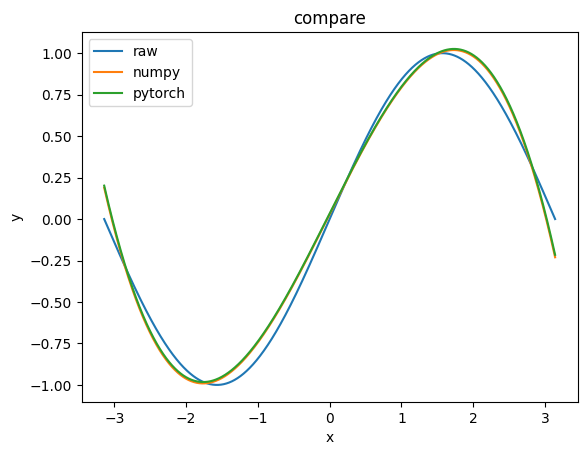

In [28]:
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)
print(f'Numpy Result: y = {a} + {b} x + {c} x^2 + {d} x^3')
print(f'Torch Result: y = {ta.item()} + {tb.item()} x + {tc.item()} x^2 + {td.item()} x^3')
y_pred = a + b * x + c * x ** 2 + d * x ** 3
y_pred_tensor = ta.item() + tb.item() * x + tc.item() *x**2 + td.item() *x**3+0.01
plt.plot(x,y,label='raw')
plt.plot(x,y_pred,label = 'numpy')
plt.plot(x,y_pred_tensor,label = 'pytorch')
plt.title('compare')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()